In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

#### Merge all data into single dataframe

In [3]:
df = pd.DataFrame()
dir_files = os.listdir("./Loom Data 09:20/Loom Data/P-all/")

for f in dir_files:
    if f[0] == '.': # Ignore other files
        continue
    print(f)
    temp_df = pd.read_csv("./Loom Data 09:20/Loom Data/P-all/" + str(f), delimiter=",")
    display(temp_df.participant.unique())
    df = pd.concat([df, temp_df], ignore_index=True)

df.shape

analytics_P23.csv


array(['P23'], dtype=object)

analytics_P22.csv


array(['P22'], dtype=object)

analyticsP5.csv


array(['P5'], dtype=object)

analytics_P20.csv


array(['P20'], dtype=object)

analytics_P21.csv


array(['P21'], dtype=object)

analytics_P19.csv


array(['P19'], dtype=object)

analytics_P25.csv


array(['P25'], dtype=object)

analytics_P24.csv


array(['P24'], dtype=object)

analytics_P18.csv


array(['P18'], dtype=object)

analytics_P26.csv


array(['P26'], dtype=object)

analytics_P27.csv


array(['P27'], dtype=object)

analytics_P3.csv


array(['P3'], dtype=object)

analytics_P2.csv


array(['P2'], dtype=object)

analytics_P6.csv


array(['P6'], dtype=object)

analytics_P7.csv


array(['P7'], dtype=object)

analytics_P4.csv


array(['P4'], dtype=object)

analytics_P9.csv


array(['P9'], dtype=object)

analytics_P8.csv


array(['P8'], dtype=object)

analytics_P16.csv


array(['P16'], dtype=object)

analytics_P28.csv


array(['P28'], dtype=object)

analytics_P14.csv


array(['P14'], dtype=object)

analytics_P10.csv


array(['P10'], dtype=object)

analytics_P11.csv


array(['P11'], dtype=object)

analytics_P13.csv


array(['P13'], dtype=object)

analytics_P12.csv


array(['P12'], dtype=object)

(219403, 12)

#### Function to get the mean time differences for 4 different conditions 

Input - Dataframe, Participant List

Output - List of time taken by participants for each event in consideration x 4 different conditions

In [4]:
df.participant.nunique()

25

In [5]:
def pacAnalysis(df, p_list):
    df = df[df.participant.isin(p_list)]

    # Single Player Mode 

    df1_single = df[df.Condition == 's']
    mask = (df1_single["Event"].ne(df1_single["Event"].shift()))
    df1_s_unique = df1_single[mask]

    mask = (df1_single["Event"].ne(df1_single["Event"].shift()))
    df1_s_unique = df1_single[mask]

    # Events to consider
    event_hashmap_p1 = {
        'looking at red cube': 'Regular Red Cube(Clone) was picked up',
        'looking at blue cube': 'Regular Blue Cube(Clone) was picked up',
        'looking at invis cube': 'Regular Neutral Cube(Clone) was picked up',
        'looking at gold cube': 'Regular Gold Cube(Clone) was picked up',
    }

    event_hashmap_p2 = {
        'looking at Drop Zone': ['Regular Red Cube(Clone)was placed in dropzone',
                                'Regular Blue Cube(Clone)was placed in dropzone',
                                'Regular Neutral Cube(Clone)was placed in dropzone',
                                'Regular Gold Cube(Clone)was placed in dropzone']
    }
    
    events_p1 = event_hashmap_p1.keys()
    events_p2 = event_hashmap_p2.keys()

    look_new_seq = True
    drop_index = list()

    # Loop and check
    for i in df1_s_unique.index:
        curr_event = df1_s_unique.loc[i, "Event"]
        if look_new_seq:
            if curr_event in events_p1:
                looking_index = i
                looking_for = event_hashmap_p1[curr_event]
                look_new_seq = False
            else:
                drop_index.append(i)
        else:
            if curr_event == looking_for:
                look_new_seq = True
            elif curr_event in events_p1:
                drop_index.append(looking_index)
                looking_for = event_hashmap_p1[curr_event]
                looking_index = i
            else: 
                drop_index.append(looking_index)
                drop_index.append(i)
                look_new_seq = True

    pac1_df = df1_s_unique.drop(index=drop_index).copy()
    
    look_new_seq = True
    drop_index = list()

    for i in df1_s_unique.index:
        curr_event = df1_s_unique.loc[i, "Event"]
        if look_new_seq:
            if curr_event in events_p2:
                looking_index = i
                looking_for = event_hashmap_p2[curr_event]
                look_new_seq = False
            else:
                drop_index.append(i)
        else:
            if curr_event in looking_for:
                look_new_seq = True
            elif curr_event in events_p2:
                drop_index.append(looking_index)
                looking_for = event_hashmap_p2[curr_event]
                looking_index = i
            else: 
                drop_index.append(looking_index)
                drop_index.append(i)
                look_new_seq = True

    pac2_df = df1_s_unique.drop(index=drop_index).copy()

    # Co-operative mode
    df1_co = df[df.Condition == "co"]

    mask_co = (df1_co["Event"].ne(df1_co["Event"].shift()))
    df1_co_unique = df1_co[mask_co]

    # Events to look for
    event_hashmap_p1_co = {
        'looking at red cube': 'Network Red Cube(Clone) was picked up',
        'looking at blue cube': 'Network Blue Cube(Clone) was picked up',
        'looking at invis cube': 'Network Neutral Cube(Clone) was picked up',
        'looking at gold cube': 'Network Gold Cube Whole(Clone) was picked up',
    }

    event_hashmap_p2_co = {
        'looking at Drop Zone': ['Network Red Cube(Clone)was placed in dropzone',
                                'Network Blue Cube(Clone)was placed in dropzone',
                                'Network Neutral Cube(Clone)was placed in dropzone',
                                "Network Gold Cube(Clone)was placed in dropzone",
                                "Network Gold Left Half(Clone)was placed in dropzone",
                                "Network Gold Right Half(Clone)was placed in dropzone"
                                ]
    }

    events_p1_co = event_hashmap_p1_co.keys()
    events_p2_co = event_hashmap_p2_co.keys()

    look_new_seq = True
    drop_index = list()

    for i in df1_co_unique.index:
        curr_event = df1_co_unique.loc[i, "Event"]
        if look_new_seq:
            if curr_event in events_p1_co:
                looking_index = i
                looking_for = event_hashmap_p1_co[curr_event]
                look_new_seq = False
            else:
                drop_index.append(i)
        else:
            if curr_event == looking_for:
                look_new_seq = True
            elif curr_event in events_p1_co:
                drop_index.append(looking_index)
                looking_for = event_hashmap_p1_co[curr_event]
                looking_index = i
            else: 
                drop_index.append(looking_index)
                drop_index.append(i)
                look_new_seq = True

    pac1_co_df = df1_co_unique.drop(index=drop_index).copy()

    look_new_seq = True
    drop_index = list()

    for i in df1_co_unique.index:
        curr_event = df1_co_unique.loc[i, "Event"]
        if look_new_seq:
            if curr_event in events_p2_co:
                looking_index = i
                looking_for = event_hashmap_p2_co[curr_event]
                look_new_seq = False
            else:
                drop_index.append(i)
        else:
            if curr_event in looking_for:
                look_new_seq = True
            elif curr_event in events_p2_co:
                drop_index.append(looking_index)
                looking_for = event_hashmap_p2_co[curr_event]
                looking_index = i
            else: 
                drop_index.append(looking_index)
                drop_index.append(i)
                look_new_seq = True

    pac2_co_df = df1_co_unique.drop(index=drop_index).copy()
    
    # Calculate the time differences 
    pac1_vals = list()
    pac1_df.reset_index(inplace=True)
    for i in range(pac1_df.shape[0]):
        if i % 2 == 0:
            x = pac1_df.loc[i, "TimeStamp"]
        else:
            y = pac1_df.loc[i, "TimeStamp"]
            val = (y - x) / 10000
            pac1_vals.append(val)
    
    pac2_vals = list()
    pac2_df.reset_index(inplace=True)
    for i in range(pac2_df.shape[0]):
        if i % 2 == 0:
            x = pac2_df.loc[i, "TimeStamp"]
        else:
            y = pac2_df.loc[i, "TimeStamp"]
            pac2_vals.append((y - x) / 10000)
    
    pac1_co_vals = list()
    pac1_co_df.reset_index(inplace=True)
    for i in range(pac1_co_df.shape[0]):
        if i % 2 == 0:
            x = pac1_co_df.loc[i, "TimeStamp"]
        else:
            y = pac1_co_df.loc[i, "TimeStamp"]
            pac1_co_vals.append((y - x) / 10000)
    
    pac2_co_vals = list()
    pac2_co_df.reset_index(inplace=True)
    for i in range(pac2_co_df.shape[0]):
        if i % 2 == 0:
            x = pac2_co_df.loc[i, "TimeStamp"]
        else:
            y = pac2_co_df.loc[i, "TimeStamp"]
            pac2_co_vals.append((y - x) / 10000)

    # Calculate the means
    pac1_mean = round(np.mean(pac1_vals), 2)
    pac2_mean = round(np.mean(pac2_vals), 2)
    pac1_co_mean = round(np.mean(pac1_co_vals), 2)
    pac2_co_mean = round(np.mean(pac2_co_vals), 2)
    
    print("PAC1 Average: {} ms".format(pac1_mean))
    print("PAC2 Average: {} ms".format(pac2_mean))
    print("PAC1 Co Average: {} ms".format(pac1_co_mean))
    print("PAC2 Co Average: {} ms".format(pac2_co_mean))

    return pac1_vals, pac2_vals, pac1_co_vals, pac2_co_vals


In [6]:
# Defining the groups
age_list = ["P10", "P11", "P12", "P14", "P16", "P2", "P20", "P21", "P25", "P28", \
    "P4", "P6", "P8", "P9"]
all_list = list(df.participant.unique())
asd_list = ["P2", "P3", "P4", "P6", "P7", "P8", "P10", "P11", "P12", "P14", "P16"]
nt_list = [x for x in all_list if x not in asd_list]

nt_list

['P23',
 'P22',
 'P5',
 'P20',
 'P21',
 'P19',
 'P25',
 'P24',
 'P18',
 'P26',
 'P27',
 'P9',
 'P28',
 'P13']

#### PAC on participants in spectrum

In [7]:
pac_asd_vals = pacAnalysis(df, asd_list)

PAC1 Average: 369.46 ms
PAC2 Average: 310.68 ms
PAC1 Co Average: 284.44 ms
PAC2 Co Average: 658.07 ms


#### PAC on NT participants 

In [8]:
pac_nt_vals = pacAnalysis(df, nt_list)

PAC1 Average: 364.61 ms
PAC2 Average: 353.77 ms
PAC1 Co Average: 438.66 ms
PAC2 Co Average: 499.44 ms


- Grouped barplot
- Grouped boxplot
- Clean code and send html 

In [9]:
# Create dataframe for plotting

cols = ["Event", "Group", "Mean Time (ms)"]

event_list = ["PAC-1", "PAC-2", "PAC-1 Co-op", "PAC-2 Co-op"] * 2
group_list = ["Neurotypical"] * 4
group_list.extend(["ASD"] * 4)
mean_val_list = list()
for x in pac_nt_vals:
    mean_val_list.append(round(np.mean(x), 2))
for x in pac_asd_vals:
    mean_val_list.append(round(np.mean(x), 2))

df_res = pd.DataFrame(dict(zip(cols, [event_list, group_list, mean_val_list])))
df_res

,Event,Group,Mean Time (ms)
0,PAC-1,Neurotypical,364.61
1,PAC-2,Neurotypical,353.77
2,PAC-1 Co-op,Neurotypical,438.66
3,PAC-2 Co-op,Neurotypical,499.44
4,PAC-1,ASD,369.46
5,PAC-2,ASD,310.68
6,PAC-1 Co-op,ASD,284.44
7,PAC-2 Co-op,ASD,658.07


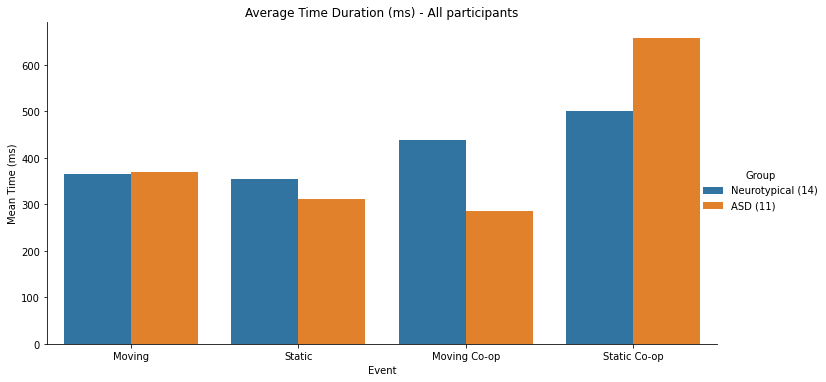

In [10]:
g = sns.catplot(data=df_res, x="Event", y="Mean Time (ms)", hue="Group", kind="bar", aspect=2)
plt.title("Average Time Duration (ms) - All participants")
new_labels = ['Neurotypical ({})'.format(len(nt_list)), \
    'ASD ({})'.format(len(asd_list))]
g.set_xticklabels(["Moving", "Static", "Moving Co-op", "Static Co-op"])

for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

Inference from the above plot -

No significant difference in single player mode

But contrasting difference in co-operative player mode - This could also be due to influence of huge outliers 

In [11]:
# Dataframe for plotting
cols = ["Event", "Group", "Time (ms)"]
unique_event_list = ["PAC-1", "PAC-2", "PAC-1 Co-op", "PAC-2 Co-op"]
unique_group_list = ["Neurotypical", "ASD"]

event_list = list()
group_list = list()
times_list = list()

for i, l in enumerate([pac_nt_vals, pac_asd_vals]):
    summer = 0
    for j, x in enumerate(l):
        event_list.extend([unique_event_list[j]] * len(x))
        summer += len(x)
        times_list.extend(x)
    group_list.extend([unique_group_list[i]] * summer)

df_res2 = pd.DataFrame(dict(zip(cols, [event_list, group_list, times_list])))
df_res2


,Event,Group,Time (ms)
0,PAC-1,Neurotypical,2663.1680
1,PAC-1,Neurotypical,359.6288
2,PAC-1,Neurotypical,172.5312
3,PAC-1,Neurotypical,389.9520
4,PAC-1,Neurotypical,217.2800
...,...,...,...
3476,PAC-2 Co-op,ASD,1053.2352
3477,PAC-2 Co-op,ASD,995.2256
3478,PAC-2 Co-op,ASD,459.1104
3479,PAC-2 Co-op,ASD,520.9472


In [13]:
df_res2.Event.unique()

array(['PAC-1', 'PAC-2', 'PAC-1 Co-op', 'PAC-2 Co-op'], dtype=object)

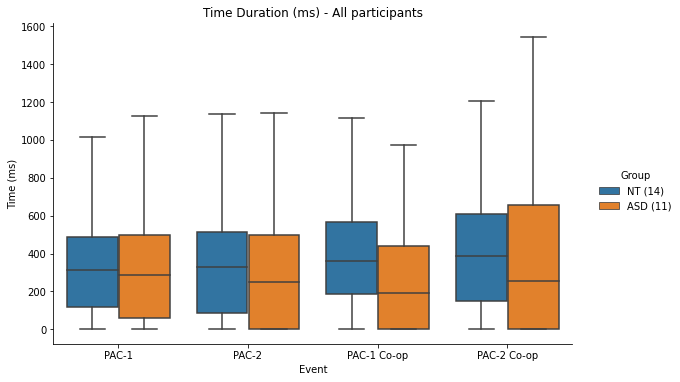

In [27]:
g = sns.catplot(data=df_res2, x="Event", y="Time (ms)", hue="Group", kind="box", aspect=1.6, \
    showfliers=False)
plt.title("Time Duration (ms) - All participants")
new_labels = ['NT ({})'.format(len(nt_list)), \
    'ASD ({})'.format(len(asd_list))]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Removed outliers for consideration 

Box plot of the individual events to analyze the variabiity 

Removed large time duration events (considering them as outliers)

There is a drop in median time duration in events between the two groups

Text(0.5, 1.0, 'Time Duration (ms)')

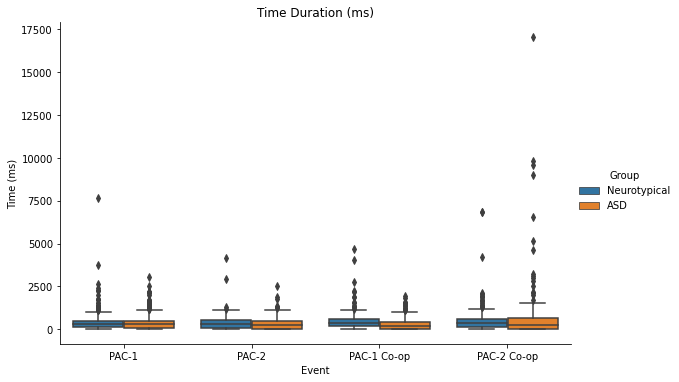

In [68]:
g = sns.catplot(data=df_res2, x="Event", y="Time (ms)", hue="Group", kind="box", aspect=1.6, \
    showfliers=True)
plt.title("Time Duration (ms)")

# Plotting with the outliers for reference

In [30]:
# Defining the groups
age_list = ["P10", "P11", "P12", "P14", "P16", "P2", "P20", "P21", "P25", "P28", \
    "P4", "P6", "P8", "P9"]
all_list = list(df.participant.unique())
asd_list = ["P2", "P3", "P4", "P6", "P7", "P8", "P10", "P11", "P12", "P14", "P16"]
nt_list = [x for x in age_list if x not in asd_list]

nt_list

['P20', 'P21', 'P25', 'P28', 'P9']

In [31]:
pac_asd_vals = pacAnalysis(df, asd_list)
pac_nt_vals = pacAnalysis(df, nt_list)

# Create dataframe for plotting

cols = ["Event", "Group", "Mean Time (ms)"]

event_list = ["PAC-1", "PAC-2", "PAC-1 Co-op", "PAC-2 Co-op"] * 2
group_list = ["Neurotypical"] * 4
group_list.extend(["ASD"] * 4)
mean_val_list = list()
for x in pac_nt_vals:
    mean_val_list.append(round(np.mean(x), 2))
for x in pac_asd_vals:
    mean_val_list.append(round(np.mean(x), 2))

df_res = pd.DataFrame(dict(zip(cols, [event_list, group_list, mean_val_list])))

PAC1 Average: 369.46 ms
PAC2 Average: 310.68 ms
PAC1 Co Average: 284.44 ms
PAC2 Co Average: 658.07 ms
PAC1 Average: 316.74 ms
PAC2 Average: 344.62 ms
PAC1 Co Average: 463.24 ms
PAC2 Co Average: 456.36 ms


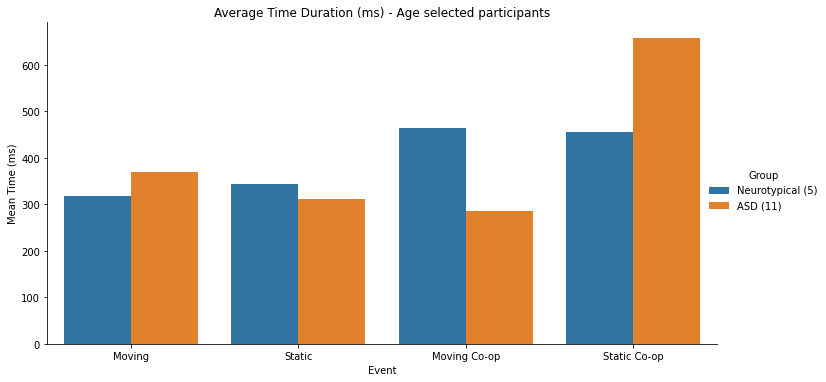

In [34]:
g = sns.catplot(data=df_res, x="Event", y="Mean Time (ms)", hue="Group", kind="bar", aspect=2)
plt.title("Average Time Duration (ms) - Age selected participants")
new_labels = ['Neurotypical ({})'.format(len(nt_list)), \
    'ASD ({})'.format(len(asd_list))]
g.set_xticklabels(["Moving", "Static", "Moving Co-op", "Static Co-op"])

for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

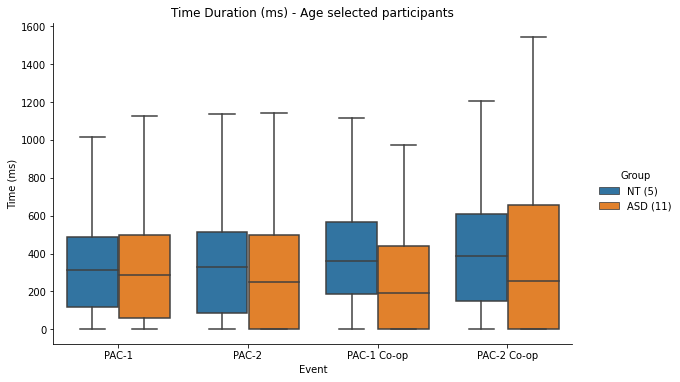

In [35]:
g = sns.catplot(data=df_res2, x="Event", y="Time (ms)", hue="Group", kind="box", aspect=1.6, \
    showfliers=False)
plt.title("Time Duration (ms) - Age selected participants")
new_labels = ['NT ({})'.format(len(nt_list)), \
    'ASD ({})'.format(len(asd_list))]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Removed outliers for consideration 

Number of Participants

In [13]:
participants_list = list()
participants_list.extend(asd_list)
participants_list.extend(nt_list)

len(participants_list)

16

Mean age of the participants (P3 excluded - 23 participants)

In [70]:
df_unique = df[df.participant.isin(participants_list)].groupby("participant").apply(lambda x:x.iloc[0, :])
df_unique.drop("P3", inplace=True)

round(df_unique["Age"].astype('int32').mean(), 2)

24.67

/Users/naren/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


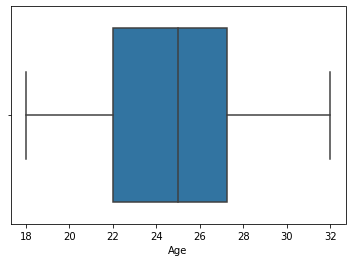

In [71]:
sns.boxplot(df_unique.Age.astype('int32'))

Count between Male and Female - (P3 and P7 excluded cuz data missing)

In [72]:
df_unique

,TimeStamp,participant,Condition,Tiral,Age,Gender,SessionTime,Event,xPos,yPos,zPos,Group
participant,,,,,,,,,,,,
P10,6.379590e+17,P10,tut,1,18,f,300.0,Game Start,NaN,NaN,NaN,NaN
P11,6.379590e+17,P11,tut,1,22,m,300.0,Game Start,NaN,NaN,NaN,NaN
P12,6.379591e+17,P12,tut,1,22,m,300.0,Game Start,NaN,NaN,NaN,NaN
P13,6.379591e+17,P13,tut,1,32,m,300.0,Game Start,NaN,NaN,NaN,NaN
P14,6.379591e+17,P14,tut,1,22,m,300.0,Game Start,NaN,NaN,NaN,NaN
P16,6.379590e+17,P16,tut,1,18,m,300.0,Game Start,NaN,NaN,NaN,NaN
P18,6.379807e+17,P18,tut,1,31,f,300.0,Game Start,NaN,NaN,NaN,NaN
P19,6.379810e+17,P19,tut,1,30,f,300.0,Game Start,NaN,NaN,NaN,NaN
P2,6.379626e+17,P2,s,1,19,m,300.0,Game Start,NaN,NaN,NaN,NaN


In [73]:
df_unique.drop("P7", inplace=True)

df_unique.Gender.value_counts()

m    15
f     8
Name: Gender, dtype: int64

In [74]:
df_unique[df_unique.participant.isin(asd_list)]

,TimeStamp,participant,Condition,Tiral,Age,Gender,SessionTime,Event,xPos,yPos,zPos,Group
participant,,,,,,,,,,,,
P10,6.379590e+17,P10,tut,1,18,f,300.0,Game Start,NaN,NaN,NaN,NaN
P11,6.379590e+17,P11,tut,1,22,m,300.0,Game Start,NaN,NaN,NaN,NaN
P12,6.379591e+17,P12,tut,1,22,m,300.0,Game Start,NaN,NaN,NaN,NaN
P14,6.379591e+17,P14,tut,1,22,m,300.0,Game Start,NaN,NaN,NaN,NaN
P16,6.379590e+17,P16,tut,1,18,m,300.0,Game Start,NaN,NaN,NaN,NaN
P2,6.379626e+17,P2,s,1,19,m,300.0,Game Start,NaN,NaN,NaN,NaN
P4,6.379570e+17,P4,tut,1,22,m,300.0,Game Start,NaN,NaN,NaN,NaN
P6,6.379582e+17,P6,s,tut,23,m,300.0,Game Start,NaN,NaN,NaN,NaN
P8,6.379590e+17,P8,tut,1,18,m,300.0,Game Start,NaN,NaN,NaN,NaN


In [75]:
df_unique[~df_unique.participant.isin(asd_list)]

,TimeStamp,participant,Condition,Tiral,Age,Gender,SessionTime,Event,xPos,yPos,zPos,Group
participant,,,,,,,,,,,,
P13,6.379591e+17,P13,tut,1,32,m,300.0,Game Start,NaN,NaN,NaN,NaN
P18,6.379807e+17,P18,tut,1,31,f,300.0,Game Start,NaN,NaN,NaN,NaN
P19,6.379810e+17,P19,tut,1,30,f,300.0,Game Start,NaN,NaN,NaN,NaN
P20,6.379807e+17,P20,tut,1,25,m,300.0,Game Start,NaN,NaN,NaN,NaN
P21,6.379816e+17,P21,tut,1,25,m,300.0,Game Start,NaN,NaN,NaN,NaN
P22,6.379824e+17,P22,tut,1,32,f,300,Game Start,c,NaN,NaN,NaN
P23,6.379876e+17,P23,tut,1,29,m,300.0,Game Start,NaN,NaN,NaN,NaN
P24,6.379885e+17,P24,tut,1,27,f,300.0,Game Start,c,NaN,NaN,NaN
P25,6.379890e+17,P25,tut,1,26,m,300.0,Game Start,c,NaN,NaN,NaN


In [58]:
df_unique[df_unique.Age.astype('int32') <= 26]

,TimeStamp,participant,Condition,Tiral,Age,Gender,SessionTime,Event,xPos,yPos,zPos,Group
participant,,,,,,,,,,,,
P10,6.379590e+17,P10,tut,1,18,f,300.0,Game Start,NaN,NaN,NaN,NaN
P11,6.379590e+17,P11,tut,1,22,m,300.0,Game Start,NaN,NaN,NaN,NaN
P12,6.379591e+17,P12,tut,1,22,m,300.0,Game Start,NaN,NaN,NaN,NaN
P14,6.379591e+17,P14,tut,1,22,m,300.0,Game Start,NaN,NaN,NaN,NaN
P16,6.379590e+17,P16,tut,1,18,m,300.0,Game Start,NaN,NaN,NaN,NaN
P2,6.379626e+17,P2,s,1,19,m,300.0,Game Start,NaN,NaN,NaN,NaN
P20,6.379807e+17,P20,tut,1,25,m,300.0,Game Start,NaN,NaN,NaN,NaN
P21,6.379816e+17,P21,tut,1,25,m,300.0,Game Start,NaN,NaN,NaN,NaN
P25,6.379890e+17,P25,tut,1,26,m,300.0,Game Start,c,NaN,NaN,NaN


In [82]:
df_unique.loc[df_unique.Age.astype('int32') <= 26, "participant"]

participant
P10    P10
P11    P11
P12    P12
P14    P14
P16    P16
P2      P2
P20    P20
P21    P21
P25    P25
P26    P26
P28    P28
P4      P4
P6      P6
P8      P8
P9      P9
Name: participant, dtype: object

### 2x2 Anova - All participants

In [16]:
# Dataframe for ANOVA analysis
cols = ["Event", "Group", "Time"]
unique_event_list = ["PAC-1", "PAC-2", "PAC-1 Co-op", "PAC-2 Co-op"]
unique_group_list = ["Neurotypical", "ASD"]

event_list = list()
group_list = list()
times_list = list()

for i, l in enumerate([pac_nt_vals, pac_asd_vals]):
    summer = 0
    for j, x in enumerate(l):
        event_list.extend([unique_event_list[j]] * len(x))
        summer += len(x)
        times_list.extend(x)
    group_list.extend([unique_group_list[i]] * summer)

df_res_all = pd.DataFrame(dict(zip(cols, [event_list, group_list, times_list])))
df_res_all


,Event,Group,Time
0,PAC-1,Neurotypical,2663.1680
1,PAC-1,Neurotypical,359.6288
2,PAC-1,Neurotypical,172.5312
3,PAC-1,Neurotypical,389.9520
4,PAC-1,Neurotypical,217.2800
...,...,...,...
3476,PAC-2 Co-op,ASD,1053.2352
3477,PAC-2 Co-op,ASD,995.2256
3478,PAC-2 Co-op,ASD,459.1104
3479,PAC-2 Co-op,ASD,520.9472


In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import researchpy as rp
import scipy.stats as stats

#perform two-way ANOVA
model = ols('Time ~ C(Event) + C(Group) + C(Event):C(Group)', data=df_res_all).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Event),2.068468e+07,3.0,18.621541,5.564044e-12
C(Group),8.674021e+04,1.0,0.234266,6.284093e-01
C(Event):C(Group),7.307900e+06,3.0,6.578993,1.973640e-04
Residual,1.285928e+09,3473.0,NaN,NaN


The p value of the interaction between Event (Moving and Static) and Group (NT and ASD) in all the participants is 0.000197 which means that there is a statistical significance in the mean time duration values between the groups and events. 

#### T Test between groups for each event - All participants

In [28]:
for event in df_res_all.Event.unique():
    temp_df = df_res_all[df_res_all.Event == event]

    results = stats.ttest_ind(temp_df.loc[temp_df.Group == unique_group_list[0], "Time"], \
               temp_df.loc[temp_df.Group == unique_group_list[1], "Time"])
    display(event)
    display(results)

'PAC-1'

Ttest_indResult(statistic=-0.22139792448055898, pvalue=0.8248127830514239)

'PAC-2'

Ttest_indResult(statistic=1.7093861162245287, pvalue=0.08776872025198748)

'PAC-1 Co-op'

Ttest_indResult(statistic=4.47491658404309, pvalue=9.073863308550244e-06)

'PAC-2 Co-op'

Ttest_indResult(statistic=-1.5182657277053981, pvalue=0.12952305155752167)

No significant difference observed between the groups among any of the events.
 
Note - Assuming confidence level of 95% 

### 2x2 ANOVA - Age selected participants

In [29]:
# Defining the groups
age_list = ["P10", "P11", "P12", "P14", "P16", "P2", "P20", "P21", "P25", "P28", \
    "P4", "P6", "P8", "P9"]
all_list = list(df.participant.unique())
asd_list = ["P2", "P3", "P4", "P6", "P7", "P8", "P10", "P11", "P12", "P14", "P16"]
nt_list = [x for x in age_list if x not in asd_list]

nt_list

['P20', 'P21', 'P25', 'P28', 'P9']

In [31]:
pac_asd_vals = pacAnalysis(df, asd_list)
pac_nt_vals = pacAnalysis(df, nt_list)

# Dataframe for plotting
cols = ["Event", "Group", "Time"]
unique_event_list = ["PAC-1", "PAC-2", "PAC-1 Co-op", "PAC-2 Co-op"]
unique_group_list = ["Neurotypical", "ASD"]

event_list = list()
group_list = list()
times_list = list()

for i, l in enumerate([pac_nt_vals, pac_asd_vals]):
    summer = 0
    for j, x in enumerate(l):
        event_list.extend([unique_event_list[j]] * len(x))
        summer += len(x)
        times_list.extend(x)
    group_list.extend([unique_group_list[i]] * summer)

df_res_age = pd.DataFrame(dict(zip(cols, [event_list, group_list, times_list])))
df_res_age


PAC1 Average: 369.46 ms
PAC2 Average: 310.68 ms
PAC1 Co Average: 284.44 ms
PAC2 Co Average: 658.07 ms
PAC1 Average: 316.74 ms
PAC2 Average: 344.62 ms
PAC1 Co Average: 463.24 ms
PAC2 Co Average: 456.36 ms


,Event,Group,Time
0,PAC-1,Neurotypical,1329.7536
1,PAC-1,Neurotypical,773.0048
2,PAC-1,Neurotypical,883.8528
3,PAC-1,Neurotypical,827.7760
4,PAC-1,Neurotypical,184.0128
...,...,...,...
2283,PAC-2 Co-op,ASD,1053.2352
2284,PAC-2 Co-op,ASD,995.2256
2285,PAC-2 Co-op,ASD,459.1104
2286,PAC-2 Co-op,ASD,520.9472


In [33]:
#perform two-way ANOVA
model = ols('Time ~ C(Event) + C(Group) + C(Event):C(Group)', data=df_res_age).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Event),1.874186e+07,3.0,13.558802,9.084697e-09
C(Group),1.359555e+05,1.0,0.295071,5.870421e-01
C(Event):C(Group),6.813151e+06,3.0,4.928976,2.050545e-03
Residual,1.050521e+09,2280.0,NaN,NaN


The p value of the interaction between Event (Moving and Static) and Group (NT and ASD) in the age selected participants is 0.00205 which means that there is a statistical significance in the mean time duration values between the groups and events. 

#### T Test between groups for each event - Age selected participants

In [34]:
for event in df_res_age.Event.unique():
    temp_df = df_res_age[df_res_age.Event == event]

    results = stats.ttest_ind(temp_df.loc[temp_df.Group == unique_group_list[0], "Time"], \
               temp_df.loc[temp_df.Group == unique_group_list[1], "Time"])
    display(event)
    display(results)

'PAC-1'

Ttest_indResult(statistic=-1.787337665280147, pvalue=0.07418181414789184)

'PAC-2'

Ttest_indResult(statistic=1.0176392630601343, pvalue=0.30932724529381916)

'PAC-1 Co-op'

Ttest_indResult(statistic=3.6967777904961543, pvalue=0.0002492866409919805)

'PAC-2 Co-op'

Ttest_indResult(statistic=-1.3039632761075415, pvalue=0.19308390227106112)

PAC Moving Co-op mode has significant statistical difference with a p-value of 0.00024 between the age selected Neurotypical and ASD groups

In [56]:
def summer(a):
    return a[0] + a[1]
df_res2.groupby(list(df_res2.columns)).apply(lambda x: summer([x.Time.values[0], x.Time.values[0]]))

Event        Group         Time     
PAC-1        ASD           0.0000           0.0000
                           6.0032          12.0064
                           7.0016          14.0032
                           16.9984         33.9968
                           18.0096         36.0192
                                           ...    
PAC-2 Co-op  Neurotypical  2059.8400     4119.6800
                           2138.0224     4276.0448
                           4227.2128     8454.4256
                           6823.6032    13647.2064
                           6860.1216    13720.2432
Length: 2517, dtype: float64

In [55]:
df_res2.drop_duplicates()

,Event,Group,Time
0,PAC-1,Neurotypical,2663.1680
1,PAC-1,Neurotypical,359.6288
2,PAC-1,Neurotypical,172.5312
3,PAC-1,Neurotypical,389.9520
4,PAC-1,Neurotypical,217.2800
...,...,...,...
3476,PAC-2 Co-op,ASD,1053.2352
3477,PAC-2 Co-op,ASD,995.2256
3478,PAC-2 Co-op,ASD,459.1104
3479,PAC-2 Co-op,ASD,520.9472
